# Chapter 03: Data Wrangling with ``pandas``

In this chapter, I will:

* Discuss the process of data manipulation
* Learn how to explore an API to gather information
* Clean and reshape data with ``pandas``

This notebook will use daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). I will use the Global Historical Climatology Network - Daily (GHCND) dataset for the Boonton 1 station (GHCND:USC00280907).

<div class='alert alert-info' role='alert'>
    <span>See the documentation <a href='https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf'>here</a>.</span>
    <br>
    <span><b>Note</b>: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.</span>
</div>

Here, I'll embed the NCEI API website for easy viewing.

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [32]:
%%html
<!--Style the <div> and <iframe> tags-->
<style>
/*Make a 16:9 container*/
.container {
    position: relative;
    overflow: hidden;
    width: 100%;
    padding-top: 56.25%;
}
/*Make the iframe responsive*/
.responsive-iframe {
    position: absolute;
    top: 0;
    left: 0;
    bottom: 0;
    right: 0;
    width: 100%;
    height: 100%;
    border: none;
}
</style>
<!--Create the div-->
<div class="container">
    <!--Create the iframe-->
    <iframe src="https://www.ncdc.noaa.gov/cdo-web/webservices/v2" class="responsive-iframe"><iframe>
</div>

## Setup

Here, I will import the main modules I'll need (``matplotlib.pyplot``, ``pandas``, ``requests`` and ``seaborn``) and create two ``DataFrame`` instance:

* A wide data format instance
* A long data format instance

In [5]:
# Necessary imports
from matplotlib import pyplot as plt
import pandas as pd
import requests
import seaborn as sns

# File paths
wide_data_file_path = 'data/wide_data.csv'
"""
str: The relative pathway to the wide data format CSV.
"""
long_data_file_path = 'data/long_data.csv'
"""
str: The relative pathway to the long data format CSV.
"""

# Variables for building the DataFrame instances
use_columns_long = ['date', 'datatype', 'value']
"""
list of str: The column headings for the columns I want to use for the long data format DataFrame instance.
"""
parse_date_arg = ['date']
"""
[str]: This variable will be used to tell pandas to parse the DataFrame instances along the date format.
"""

# Creating the DataFrame instances: wide & long
wide_df = pd.read_csv(wide_data_file_path, parse_dates = parse_date_arg)
print(type(wide_df))
"""
pandas.core.frame.DataFrame: The wide format DataFrame instance.
"""
long_df = pd.read_csv(long_data_file_path, parse_dates = parse_date_arg, usecols = use_columns_long)
"""
pandas.core.frame.DataFrame: The long format DataFrame instance.
"""

# Sort columns in the long DataFrame instance
long_df = long_df[use_columns_long]

<class 'pandas.core.frame.DataFrame'>


## Background: Wide Data vs. Long Data

<figure>
    <img src='wide_data_vs_long_data.png' alt='Wide Data Vs. Long Data' width='100%' height='max'>
    <figcaption style='text-align:center;'>Wide Data vs. Long Data</figcaption>
</figure>

From the [Wikipedia article on wide and narrow data](https://en.wikipedia.org/wiki/Wide_and_narrow_data):

> Wide and narrow (sometimes un-stacked and stacked, or wide and tall) are terms used to describe two different presentations for tabular data.
> 
> Wide, or unstacked data is presented with each different data variable in a separate column.
>
> Narrow, stacked, or long data is presented with one column containing all the values and another column listing the context of the value. This is often easier to implement; addition of a new field does not require any changes to the structure of the table, however it can be harder for people to understand.

### Wide Data Format

When data is in a wide data format, my variables will have their own columns.

In [6]:
# Get the first x number of columns from the wide DataFrame instance
number_of_rows_to_get = 6
"""
int: The number of rows to display.
"""
wide_df.head(number_of_rows_to_get)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


This makes describing data with ``pandas`` easy.

In [7]:
wide_df.describe(include = 'all', datetime_is_numeric = True)

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


### Long Data Format

Long data ``DataFrame`` instances will essentially have 3 columns:

* The main identifier for information (in this case, the date)
* The datatype of the variable (the various variable names)
* The value of a datatype

Since my data has 3 variables per entry (``TMAX``, ``TMIN``, and ``TOBS``), each date will have three rows of data.

In [8]:
long_df.head(number_of_rows_to_get)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


Since plotting long format data in ``pandas`` can get quite tricky, I'll use ``seaborn`` instead.

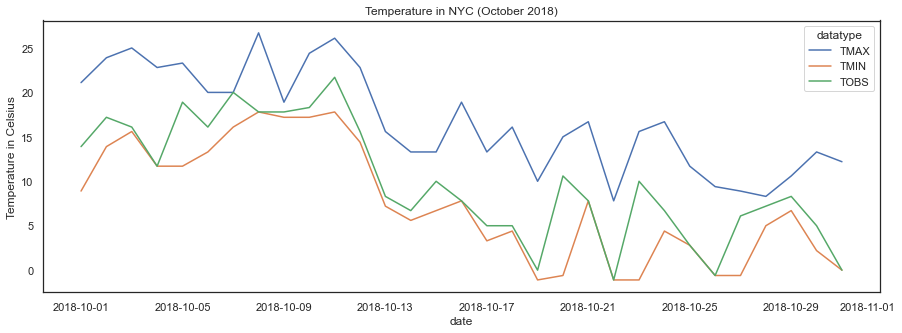

In [9]:
# Seaborn variables
y_label = 'Temperature in Celsius'
"""
str: The y-axis label for this seaborn plot.
"""
title = 'Temperature in NYC (October 2018)'
"""
str: The title for the seaborn plot.
"""
rc_dict = {'figure.figsize': (15, 5)}
"""
{str: (int, int)}: A dictionary defining the seaborn figure size.
"""
style_str = 'white'
"""
str: The style argument for the seaborn plot.
"""

# Drawing the plot
sns.set_theme(rc = rc_dict, style = style_str)
ax = sns.lineplot(
    data = long_df,
    x = 'date',
    y = 'value',
    hue = 'datatype'
)
ax.set_ylabel(y_label)
ax.set_title(title)
plt.show()

Now I can facet the plots using ``seaborn``.

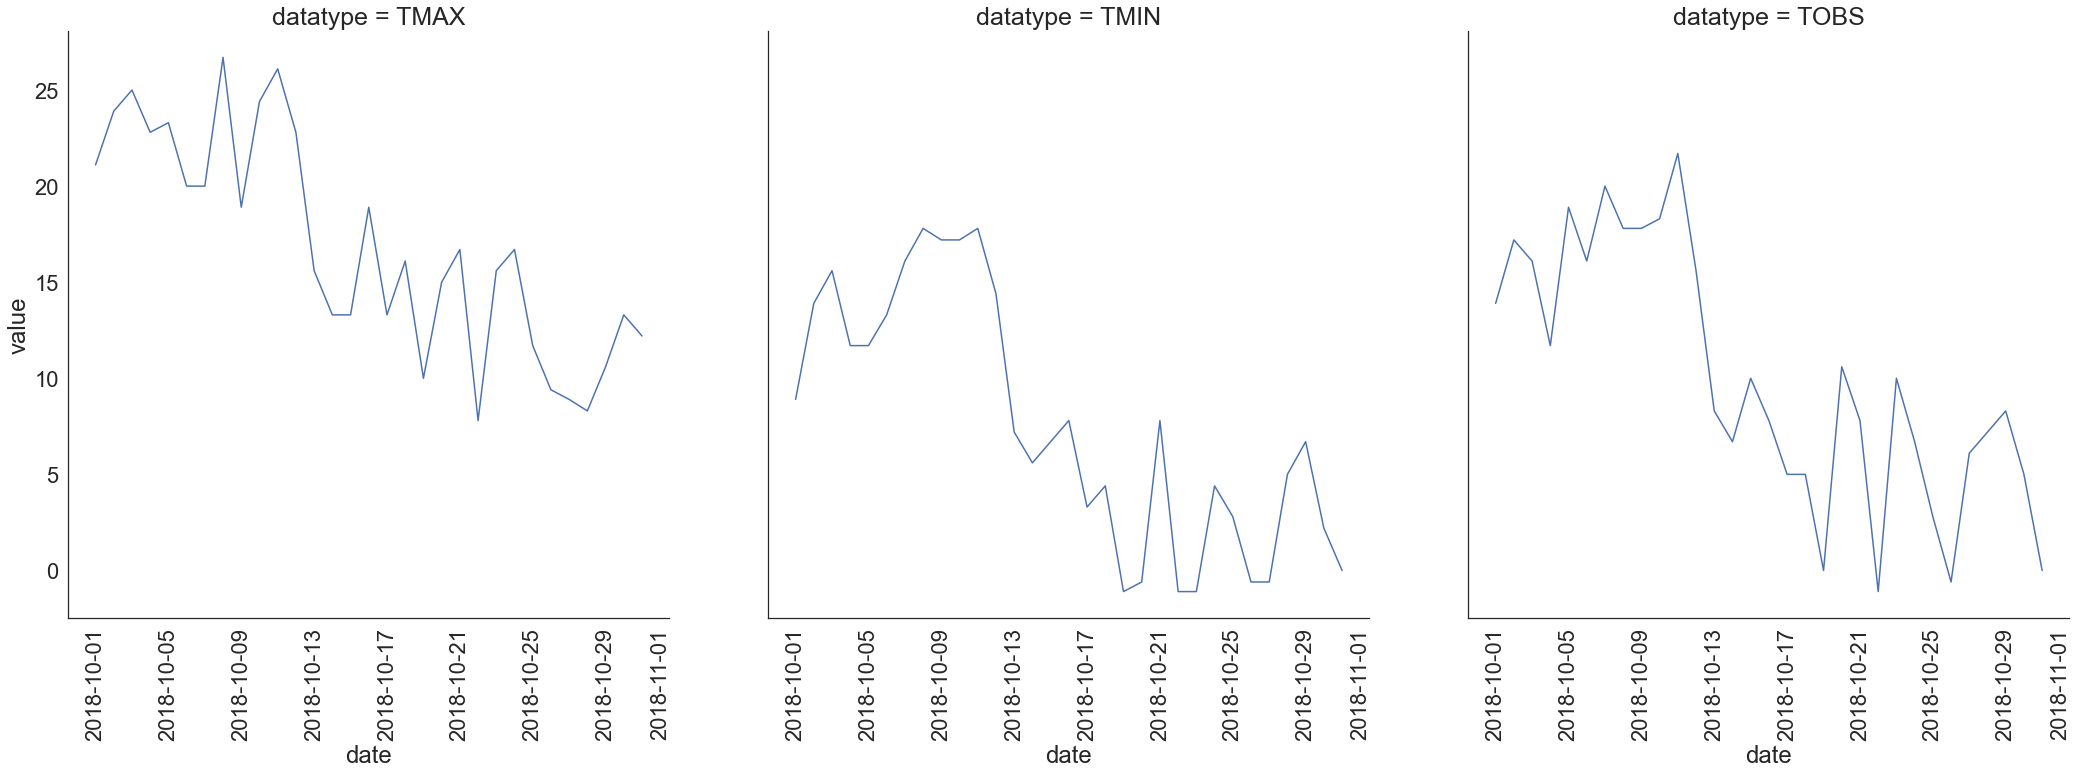

In [10]:
# Plot variables
rc_dict = {'figure.figsize': (20, 10)}
"""
{str: (int, int)}: A dictionary defining the seaborn figure size.
"""
font_scl = 2
"""
int: The scaling for fonts in the faceted plots.
"""
title_size = 25
"""
str: The size of the title for the facet plots.
"""
x_label_rotation = 90
"""
int: The degree of rotation for the x-labels.
"""
plot_height = 10
"""
int: The height of the faceted plots.
"""
col_key = 'datatype'
"""
str: The key to facet out the datatype.
"""

# Drawing the plots
sns.set(rc = rc_dict, style = style_str, font_scale = font_scl)
g = sns.FacetGrid(long_df, col = col_key, height = plot_height)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size = title_size)
g.set_xticklabels(rotation = x_label_rotation)
plt.show()

## Using the NCEI API

Before I begin, I need to request a token from the NCEI. I'll paste it down here and call it my ``api_token_dict``. I'll also post multiple variables that will make retrieving the data much easier.

In [11]:
# The token dictionary I need to access the NCEI data.
api_token_dict = {'token': 'ysVIqRTQlsItJQPLcOelgYbIIxPancXx'}
"""
{str: str}: The NCEI API token key I need to access the data.
"""

# Variables that will help my GET request.
api_website = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/'
"""
str: The website I'll use for the NCEI API.
"""
request_endpoint = 'datasets'
"""
str: The name of the endpoint I want to get.
"""
test_payload = {'startdate': '2018-10-01'}
"""
dict[str, str]: The payload I want to retrieve.
"""

'\ndict[str, str]: The payload I want to retrieve.\n'

Now I will make a function that will make my request for me.

In [12]:
# Defining the function that will make my GET request.
def make_request(endpoint, payload = None):
    """
    Make a request to a specific endpoint on the weather API
    passing headers and optional payload.

    Parameters
    ----------
    endpoint: str
        The endpoint of the API I want to make a GET request to.
    payload: dict[str, str]
        A dictionary of data to pass along with the request.

    Returns
    -------
    requests.Response
        A response object.
    """
    return requests.get(
            f'{api_website}{endpoint}',
            headers = api_token_dict,
            params = payload
    )

I will now call the function to retrieve the ``Response`` element I need.

In [13]:
# Create the Response instance.
response = make_request(request_endpoint, test_payload)

# If the function worked, calling response.ok will return True
response.ok

True

### Getting the Keys of the ``Response`` Instance

The ``Response`` instance returns a JSON payload. I can use the ``json()`` method to access JSON payload. Because JSON objects can be treated like dictionaries, I can access the keys of the JSON like a dictionary.

In [14]:
# Access the JSON payload
payload = response.json()

# Return the keys of the JSON payload
payload.keys()

dict_keys(['metadata', 'results'])

The ``metadata`` key will tell me alot about what information I got from the request.

In [15]:
# Returning the metadata of the JSON instance.
meta_key = 'metadata'
"""
str: The key I need to access the metadata of the JSON payload. 
"""
payload[meta_key]

{'resultset': {'offset': 1, 'count': 11, 'limit': 25}}

More importantly, the ``results`` key will give me access to the data I requested. The ``results`` key will return what will be in the rows of my ``DataFrame`` instance. Each entry in the list is a dictionary, so I can look at the keys to get the fields.

In [16]:
# Return what kind of data I got
results_key = 'results'
"""
str: The key I need to access what kind of data I got from the JSON payload.
"""
row_headings_index = 0
"""
int: The index for the row headings.

By default, this will be 0.
"""
payload[results_key][row_headings_index].keys()

dict_keys(['uid', 'mindate', 'maxdate', 'name', 'datacoverage', 'id'])

I only need the information within the ``id`` key and ``name`` key. So I'll make a function that does a list comprehension on ``payload`` to make a list of tuples that will tell me what ID I'll need to use on my next get call.

In [17]:
def parse_payload(field_1, field_2, key_1, payload_in):
    """
    Perform a list comprehension on a dictionary payload.

    Parameters
    ----------
    field_1 : str
        The key for the first field I want to get.
    field_2 : str
        The key for the second field I want to get.
    key_1 : str
        The key where I can find field_1 and field_2.
    payload_in: dict
        The

    Returns
    -------
    list[tuple[str, str]]
        The list comprehension I want to get.

    Note
    ----
    The :param:`payload_in` will be the parent for all other arguments in this function.
    Both :param:`field_1` and :param:`field_2` are keys within the :param:`key_1` dictionary.
    """
    return [(data[field_1], data[field_2]) for data in payload_in[key_1]]

# Create list comprehension to get the information within the id key and name key
list_comprehension = parse_payload('id', 'name', 'results', payload)
"""list[tuple[str, str]]: A list comprehension of the names and IDs for data in my NCEI GET instance.
"""

# Display the results.
list_comprehension

[('GHCND', 'Daily Summaries'),
 ('GSOM', 'Global Summary of the Month'),
 ('GSOY', 'Global Summary of the Year'),
 ('NEXRAD2', 'Weather Radar (Level II)'),
 ('NEXRAD3', 'Weather Radar (Level III)'),
 ('NORMAL_ANN', 'Normals Annual/Seasonal'),
 ('NORMAL_DLY', 'Normals Daily'),
 ('NORMAL_HLY', 'Normals Hourly'),
 ('NORMAL_MLY', 'Normals Monthly'),
 ('PRECIP_15', 'Precipitation 15 Minute'),
 ('PRECIP_HLY', 'Precipitation Hourly')]

### Figuring Out What Data Category I Want

Because the daily temperature data I want is in the ``GHCND`` data, I need to make another GET request. More specifically, I need to make a request to the ``datacategories`` endpoint to return what data categories I can get. To get the data categories in the ``GHCND`` dataset, I need to set the ``datasetid`` payload request as ``GHCND``.

In [18]:
endpoint_in = 'datacategories'
"""
str: The endpoint I want to return.

In this case, it will be the data categories from the GHCND dataset.
"""
payload_in = {'datasetid': 'GHCND'}
"""
dict[str, str]: The payload I want to load for this request.

In this case, I want to use the ``datasetid`` key to return values from the ``GHCND`` dataset.
"""
response = make_request(endpoint_in, payload_in)

# Check to see if the response went through.
response.ok

True

Now I'll convert the JSON into a ``dict`` and pull from what's inside the ``results`` portion of the payload.

In [19]:
payload = response.json()['results']
"""
dict: The payload with the results I want.
"""
payload

[{'name': 'Evaporation', 'id': 'EVAP'},
 {'name': 'Land', 'id': 'LAND'},
 {'name': 'Precipitation', 'id': 'PRCP'},
 {'name': 'Sky cover & clouds', 'id': 'SKY'},
 {'name': 'Sunshine', 'id': 'SUN'},
 {'name': 'Air Temperature', 'id': 'TEMP'},
 {'name': 'Water', 'id': 'WATER'},
 {'name': 'Wind', 'id': 'WIND'},
 {'name': 'Weather Type', 'id': 'WXTYPE'}]

### Grab the Data Type ID for the Temperature Category

I will use the ``datatypes`` endpoint with a ``{'datacategoryid': 'TEMP', 'limit': limit}`` payload to get the ``TEMP`` data category. I'll use the ``limit`` to make sure I'm not retrieving too much (or too little) information.

In [20]:
limit = 100
"""
int: The number of datatypes I want to get.
"""
endpoint_in = 'datatypes'
payload_in = {'datacategoryid': 'TEMP', 'limit': limit}
response = make_request(endpoint_in, payload_in)
response.ok

True

Now I'll use a list comprehension to grab the ``id`` and ``name`` fields from the ``response``.

In [21]:
payload = response.json()
list_comprehension = parse_payload('id', 'name', 'results', payload)
list_comprehension

[('CDSD', 'Cooling Degree Days Season to Date'),
 ('DATN',
  'Number of days included in the multiday minimum temperature (MDTN)'),
 ('DATX',
  'Number of days included in the multiday maximum temperature (MDTX)'),
 ('DLY-DUTR-NORMAL', 'Long-term averages of daily diurnal temperature range'),
 ('DLY-DUTR-STDDEV',
  'Long-term standard deviations of daily diurnal temperature range'),
 ('DLY-TAVG-NORMAL', 'Long-term averages of daily average temperature'),
 ('DLY-TAVG-STDDEV',
  'Long-term standard deviations of daily average temperature'),
 ('DLY-TMAX-NORMAL', 'Long-term averages of daily maximum temperature'),
 ('DLY-TMAX-STDDEV',
  'Long-term standard deviations of daily maximum temperature'),
 ('DLY-TMIN-NORMAL', 'Long-term averages of daily minimum temperature'),
 ('DLY-TMIN-STDDEV',
  'Long-term standard deviations of daily minimum temperature'),
 ('EMNT', 'Extreme minimum temperature for the period.'),
 ('EMXT', 'Extreme maximum temperature for the period.'),
 ('HDSD', 'Heating De

The information I want are the last 5 fields of the ``payload``. So to access it in the future, I'll use the following list comprehension.

```python
# Create the response
limit = 100
endpoint_in = 'datatypes'
payload_in = {'datacategoryid': 'TEMP', 'limit': limit}
response = make_request(endpoint_in, payload_in)

# Turn the JSON payload into a dictionary
payload = response.json()

# Parse the dictionary
# Look at the last 5 fields
[(datatype['id'], datatype['name']) for datatype in payload['results']][-5:]
```